In [7]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [138]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets.values.ravel()

print(X.isnull().sum())
print("\nFeature data:\n\n",X.head())  
print("\nTarget data:\n\n",y) 
print(f"\nMinimum values:\n{X.min()}")
print(f"\nMaximum values:\n{X.max()}")


Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

Feature data:

    Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity  

In [140]:
columns_to_scale = ['Magnesium','Proline']
scaler = MinMaxScaler()
X[['Magnesium_scaled','Proline_scaled']] = scaler.fit_transform(X[columns_to_scale])
X = X.drop(columns = ['Magnesium','Proline'])

In [142]:
y_array = wine.data.targets
y_classes = y_array['class']
correlations = X.corrwith(y_classes)
print("Correlation with target:\n",correlations)

Correlation with target:
 Alcohol                        -0.328222
Malicacid                       0.437776
Ash                            -0.049643
Alcalinity_of_ash               0.517859
Total_phenols                  -0.719163
Flavanoids                     -0.847498
Nonflavanoid_phenols            0.489109
Proanthocyanins                -0.499130
Color_intensity                 0.265668
Hue                            -0.617369
0D280_0D315_of_diluted_wines   -0.788230
Magnesium_scaled               -0.209179
Proline_scaled                 -0.633717
dtype: float64


In [144]:
selected_features = correlations[correlations.abs() >= 0.2].index
print("Selected Features(based on correlation threshold = 0.2):\n", selected_features)
X_selected = X[selected_features]

Selected Features(based on correlation threshold = 0.2):
 Index(['Alcohol', 'Malicacid', 'Alcalinity_of_ash', 'Total_phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
       'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines',
       'Magnesium_scaled', 'Proline_scaled'],
      dtype='object')


In [146]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9814814814814815


In [150]:
accuracies = []
Ks = 40
for i in range(1, Ks+1):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
  knn = KNeighborsClassifier(n_neighbors=i)  
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
print(accuracies)

[0.9814814814814815, 0.9629629629629629, 0.9814814814814815, 0.9629629629629629, 0.9629629629629629, 0.9259259259259259, 0.9444444444444444, 0.9444444444444444, 0.9629629629629629, 0.9444444444444444, 0.9629629629629629, 0.9629629629629629, 0.9444444444444444, 0.9259259259259259, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9629629629629629, 0.9629629629629629, 0.9444444444444444, 0.9629629629629629, 0.9444444444444444, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444]


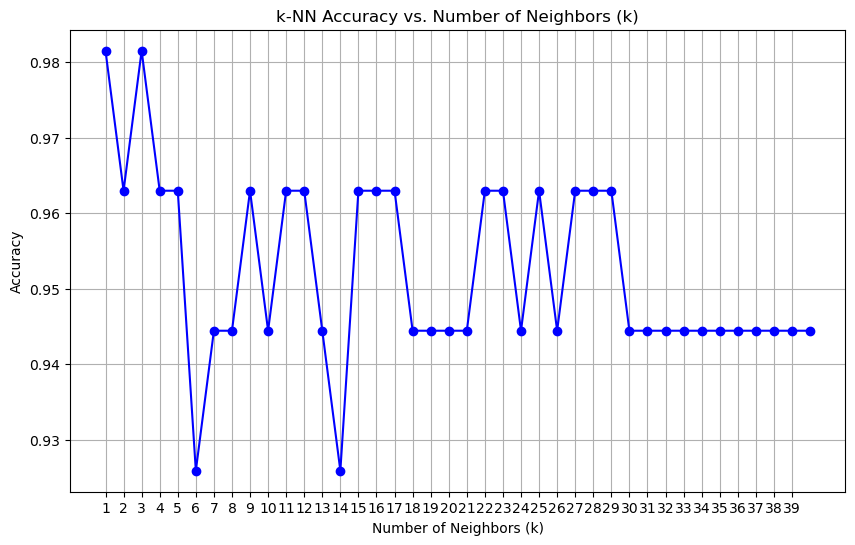

Minimum accuracy = 0.9259259259259259
Maximum accuracy = 0.9814814814814815


In [152]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, Ks+1), accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k)
plt.grid()
plt.show()
print(f"Minimum accuracy = {min(accuracies)}")
print(f"Maximum accuracy = {max(accuracies)}")